In [134]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
# Lists to store extracted data
reviewer_names_list = []
review_dates_list = []
review_texts_list = []
seat_types_list = []
seat_comfort_list = []
cabin_staff_service_list = []
food_beverages_list = []
inflight_entertainment_list = []
ground_service_list = []
value_for_money_list = []
recommended_list = []
type_of_traveller_list = []
route_list = []
date_flown_list = []
aircraft_list = []  # List to store aircraft data
wifi_connectivity_list = []  # Add this list to store wifi connectivity ratings

In [ ]:
# Function to extract details from a single review
def extract_review_data(review):
    # Extract reviewer name, review date, review text
    reviewer_name = review.find('span', itemprop='name').get_text(strip=True) if review.find('span', itemprop='name') else None
    review_date = review.find('time', itemprop='datePublished')['datetime'] if review.find('time', itemprop='datePublished') else None
    review_text = review.find('div', itemprop='reviewBody').text.strip() if review.find('div', itemprop='reviewBody') else None

    # Extract aircraft info
    aircraft = review.find('td', class_='review-value').text.strip() if review.find('td', class_='review-rating-header cabin_flown') else None

    # Extract additional details
    type_of_traveller = None
    seat_type = None
    route = None
    date_flown = None

    # Find the review ratings table
    ratings_table = review.find('table', class_='review-ratings')

    if ratings_table:
        for row in ratings_table.find_all('tr'):
            header = row.find('td', class_='review-rating-header')
            if header:
                header_text = header.text.strip()
                if header_text == 'Type Of Traveller':
                    type_of_traveller = row.find('td', class_='review-value').text.strip() if row.find('td', class_='review-value') else None
                elif header_text == 'Seat Type':
                    seat_type = row.find('td', class_='review-value').text.strip() if row.find('td', class_='review-value') else None
                elif header_text == 'Route':
                    route = row.find('td', class_='review-value').text.strip() if row.find('td', class_='review-value') else None
                elif header_text == 'Date Flown':
                    date_flown = row.find('td', class_='review-value').text.strip() if row.find('td', class_='review-value') else None

    # Extract ratings safely by checking the length of the list first
    ratings = review.find_all('td', class_='review-rating-stars')

    seat_comfort = len(ratings[0].find_all('span', class_='star fill')) if len(ratings) > 0 else None
    cabin_staff_service = len(ratings[1].find_all('span', class_='star fill')) if len(ratings) > 1 else None
    food_and_beverages = len(ratings[2].find_all('span', class_='star fill')) if len(ratings) > 2 else None
    inflight_entertainment = len(ratings[3].find_all('span', class_='star fill')) if len(ratings) > 3 else None
    ground_service = len(ratings[4].find_all('span', class_='star fill')) if len(ratings) > 4 else None
    value_for_money = len(ratings[5].find_all('span', class_='star fill')) if len(ratings) > 5 else None
    wifi_connectivity = len(ratings[6].find_all('span', class_='star fill')) if len(ratings) > 6 else None

    recommended = review.find('td', class_='review-value rating-no').text.strip() if review.find('td', class_='review-value rating-no') else 'yes'

    # Append extracted data to respective lists, ensuring all lists remain the same length
    reviewer_names_list.append(reviewer_name)
    review_dates_list.append(review_date)
    review_texts_list.append(review_text)
    aircraft_list.append(aircraft)  # Append aircraft data
    seat_types_list.append(seat_type)
    seat_comfort_list.append(seat_comfort)
    cabin_staff_service_list.append(cabin_staff_service)
    food_beverages_list.append(food_and_beverages)
    inflight_entertainment_list.append(inflight_entertainment)
    ground_service_list.append(ground_service)
    wifi_connectivity_list.append(wifi_connectivity)
    value_for_money_list.append(value_for_money)
    recommended_list.append(recommended)
    type_of_traveller_list.append(type_of_traveller)
    route_list.append(route)
    date_flown_list.append(date_flown)


In [ ]:
def scrape_reviews(base_url, num_pages):
    for page in range(1, num_pages + 1):
        url = f"{base_url}/page/{page}/"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        reviews = soup.find_all('div', class_='body')
        for review in reviews:
            extract_review_data(review)

        # Print a message after every 10 pages
        if page % 10 == 0:
            print(f"Scraped {page} pages so far...")

In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'
num_pages = 387
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...
Scraped 170 pages so far...
Scraped 180 pages so far...
Scraped 190 pages so far...
Scraped 200 pages so far...
Scraped 210 pages so far...
Scraped 220 pages so far...
Scraped 230 pages so far...
Scraped 240 pages so far...
Scraped 250 pages so far...
Scraped 260 pages so far...
Scraped 270 pages so far...
Scraped 280 pages so far...
Scraped 290 pages so far...
Scraped 300 pages so far...
Scraped 310 pages so far...
Scraped 320 pages so far...
Scraped 330 pages so far...
Scraped 340 pages so far...
Scraped 350 pages so far...
Scraped 360 pages so far...
S

In [ ]:
df1_reviews = pd.DataFrame({
    'Reviewer Names': reviewer_names_list,
    'Review Date': review_dates_list,
    'Review Text': review_texts_list,
    'Aircraft': aircraft_list,  # Include aircraft data in DataFrame
    'Type Of Traveller': type_of_traveller_list,
    'Seat Type': seat_types_list,
    'Route': route_list,
    'Date Flown': date_flown_list,
    'Seat Comfort': seat_comfort_list,
    'Cabin Staff Service': cabin_staff_service_list,
    'Food & Beverages': food_beverages_list,
    'Inflight Entertainment': inflight_entertainment_list,
    'Ground Service': ground_service_list,
    'Value For Money': value_for_money_list,
    'Wifi & Connectivity': wifi_connectivity_list,
    'Recommended': recommended_list,
})


In [ ]:
df1_reviews.shape

(3865, 16)

In [ ]:
df1_reviews.to_csv('british_airways_reviews.csv', index=False)

In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/emirates'
num_pages = 240
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...
Scraped 170 pages so far...
Scraped 180 pages so far...
Scraped 190 pages so far...
Scraped 200 pages so far...
Scraped 210 pages so far...
Scraped 220 pages so far...
Scraped 230 pages so far...
Scraped 240 pages so far...


In [ ]:
df2_reviews = pd.DataFrame({
    'Reviewer Names': reviewer_names_list,
    'Review Date': review_dates_list,
    'Review Text': review_texts_list,
    'Aircraft': aircraft_list,  # Include aircraft data in DataFrame
    'Type Of Traveller': type_of_traveller_list,
    'Seat Type': seat_types_list,
    'Route': route_list,
    'Date Flown': date_flown_list,
    'Seat Comfort': seat_comfort_list,
    'Cabin Staff Service': cabin_staff_service_list,
    'Food & Beverages': food_beverages_list,
    'Inflight Entertainment': inflight_entertainment_list,
    'Ground Service': ground_service_list,
    'Value For Money': value_for_money_list,
    'Wifi & Connectivity': wifi_connectivity_list,
    'Recommended': recommended_list,
})


In [ ]:
df2_reviews.sample(10)

,Reviewer Names,Review Date,Review Text,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Recommended
3571,D Whalley,2014-09-28,Rome to London Gatwick. Delayed take-off from ...,Economy Class,None,Economy Class,None,None,3,4.0,3.0,1.0,5.0,NaN,NaN,yes
3254,J Gonzaga,2015-03-18,Club Europe from LHR to Frankfurt RTN. Outboun...,Business Class,None,Business Class,None,None,3,5.0,5.0,1.0,5.0,NaN,NaN,yes
553,Tyler Speer,2022-05-08,Not Verified | British Airways continues to d...,Business,Business,Economy Class,Glasgow to New York,May 2022,3,4.0,4.0,4.0,1.0,4.0,1.0,no
6115,A Archer,2014-03-30,Flew on EK 108 from Larnaca to Dubai on their ...,Economy Class,None,Economy Class,None,None,5,5.0,5.0,5.0,5.0,NaN,NaN,yes
4015,J Hadjana,2023-05-03,✅ Trip Verified | The quality is super too lo...,A380,Couple Leisure,Economy Class,Dubai to Singapore,April 2023,1,1.0,1.0,5.0,4.0,1.0,3.0,no
5361,S de Guzman,2016-02-22,My husband and I enjoyed our outbound Emirates...,A380,Couple Leisure,Economy Class,BLR to SFO via DXB,February 2016,1,5.0,5.0,5.0,5.0,3.0,5.0,yes
3211,Lyn Neil,2015-04-14,LGW to LAS had a great trip out on 2/4/15 good...,Premium Economy,None,Premium Economy,None,None,5,5.0,5.0,4.0,5.0,NaN,NaN,yes
4337,M Haldemo,2020-01-01,✅ Trip Verified | I was on a 7 hour flight fr...,Family Leisure,Family Leisure,Economy Class,Rome to Dubai,December 2019,1,1.0,3.0,3.0,3.0,2.0,1.0,no
5659,C H Loh,2015-06-01,26-27 May DUB-DXB. 27 May DXB-KUL. My best Emi...,Economy Class,None,Economy Class,None,None,4,5.0,5.0,5.0,5.0,NaN,NaN,yes
907,R Roosman,2019-10-08,Not Verified | Calgary to Gothenburg via Lond...,Solo Leisure,Solo Leisure,Economy Class,Calgary to Gothenburg via London,September 2019,1,4.0,3.0,4.0,4.0,3.0,NaN,yes


Index(['Reviewer_Names', 'Review_Date', 'Review_Text', 'Aircraft',
       'Type_Of_Traveller', 'Seat_Type', 'Route', 'Date_Flown', 'Seat_Comfort',
       'Cabin_Staff_Service', 'Food_&_Beverages', 'Inflight_Entertainment',
       'Ground_Service', 'Value_For_Money', 'Wifi_&_Connectivity',
       'Recommended'],
      dtype='object')

In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/qatar-airways'
num_pages = 240
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...
Scraped 170 pages so far...
Scraped 180 pages so far...
Scraped 190 pages so far...
Scraped 200 pages so far...
Scraped 210 pages so far...
Scraped 220 pages so far...
Scraped 230 pages so far...
Scraped 240 pages so far...


In [ ]:
df3_reviews = pd.DataFrame({
    'Reviewer Names': reviewer_names_list,
    'Review Date': review_dates_list,
    'Review Text': review_texts_list,
    'Aircraft': aircraft_list,  # Include aircraft data in DataFrame
    'Type Of Traveller': type_of_traveller_list,
    'Seat Type': seat_types_list,
    'Route': route_list,
    'Date Flown': date_flown_list,
    'Seat Comfort': seat_comfort_list,
    'Cabin Staff Service': cabin_staff_service_list,
    'Food & Beverages': food_beverages_list,
    'Inflight Entertainment': inflight_entertainment_list,
    'Ground Service': ground_service_list,
    'Value For Money': value_for_money_list,
    'Wifi & Connectivity': wifi_connectivity_list,
    'Recommended': recommended_list,
})


In [ ]:
df3_reviews.shape

(8665, 16)

In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/cathay-pacific-airways/'
num_pages = 146
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/singapore-airlines/'
num_pages = 162
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/singapore-airlines/'
num_pages = 162
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/swiss-international-air-lines'
num_pages = 162
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/qantas-airways/'
num_pages = 266
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...
Scraped 170 pages so far...
Scraped 180 pages so far...
Scraped 190 pages so far...
Scraped 200 pages so far...
Scraped 210 pages so far...
Scraped 220 pages so far...
Scraped 230 pages so far...
Scraped 240 pages so far...
Scraped 250 pages so far...
Scraped 260 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/turkish-airlines'
num_pages = 193
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...
Scraped 170 pages so far...
Scraped 180 pages so far...
Scraped 190 pages so far...


In [ ]:
df4_reviews = pd.DataFrame({
    'Reviewer Names': reviewer_names_list,
    'Review Date': review_dates_list,
    'Review Text': review_texts_list,
    'Aircraft': aircraft_list,  # Include aircraft data in DataFrame
    'Type Of Traveller': type_of_traveller_list,
    'Seat Type': seat_types_list,
    'Route': route_list,
    'Date Flown': date_flown_list,
    'Seat Comfort': seat_comfort_list,
    'Cabin Staff Service': cabin_staff_service_list,
    'Food & Beverages': food_beverages_list,
    'Inflight Entertainment': inflight_entertainment_list,
    'Ground Service': ground_service_list,
    'Value For Money': value_for_money_list,
    'Wifi & Connectivity': wifi_connectivity_list,
    'Recommended': recommended_list,
})


In [ ]:
df4_reviews.shape

(19052, 16)

In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/airasia/'
num_pages = 98
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/delta-air-lines'
num_pages = 308
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...
Scraped 170 pages so far...
Scraped 180 pages so far...
Scraped 190 pages so far...
Scraped 200 pages so far...
Scraped 210 pages so far...
Scraped 220 pages so far...
Scraped 230 pages so far...
Scraped 240 pages so far...
Scraped 250 pages so far...
Scraped 260 pages so far...
Scraped 270 pages so far...
Scraped 280 pages so far...
Scraped 290 pages so far...
Scraped 300 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/united-airlines'
num_pages = 498
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...
Scraped 170 pages so far...
Scraped 180 pages so far...
Scraped 190 pages so far...
Scraped 200 pages so far...
Scraped 210 pages so far...
Scraped 220 pages so far...
Scraped 230 pages so far...
Scraped 240 pages so far...
Scraped 250 pages so far...
Scraped 260 pages so far...
Scraped 270 pages so far...
Scraped 280 pages so far...
Scraped 290 pages so far...
Scraped 300 pages so far...
Scraped 310 pages so far...
Scraped 320 pages so far...
Scraped 330 pages so far...
Scraped 340 pages so far...
Scraped 350 pages so far...
Scraped 360 pages so far...
S

In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/garuda-indonesia'
num_pages = 94
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/klm-royal-dutch-airlines'
num_pages = 163
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/westjet'
num_pages = 114
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...


In [ ]:
df5_reviews = pd.DataFrame({
    'Reviewer Names': reviewer_names_list,
    'Review Date': review_dates_list,
    'Review Text': review_texts_list,
    'Aircraft': aircraft_list,  # Include aircraft data in DataFrame
    'Type Of Traveller': type_of_traveller_list,
    'Seat Type': seat_types_list,
    'Route': route_list,
    'Date Flown': date_flown_list,
    'Seat Comfort': seat_comfort_list,
    'Cabin Staff Service': cabin_staff_service_list,
    'Food & Beverages': food_beverages_list,
    'Inflight Entertainment': inflight_entertainment_list,
    'Ground Service': ground_service_list,
    'Value For Money': value_for_money_list,
    'Wifi & Connectivity': wifi_connectivity_list,
    'Recommended': recommended_list,
})


In [ ]:
df5_reviews.shape

(31779, 16)

In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/sas-scandinavian-airlines'
num_pages = 92
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...


In [ ]:
base_url = 'https://www.airlinequality.com/airline-reviews/american-airlines'
num_pages = 616
scrape_reviews(base_url, num_pages)

Scraped 10 pages so far...
Scraped 20 pages so far...
Scraped 30 pages so far...
Scraped 40 pages so far...
Scraped 50 pages so far...
Scraped 60 pages so far...
Scraped 70 pages so far...
Scraped 80 pages so far...
Scraped 90 pages so far...
Scraped 100 pages so far...
Scraped 110 pages so far...
Scraped 120 pages so far...
Scraped 130 pages so far...
Scraped 140 pages so far...
Scraped 150 pages so far...
Scraped 160 pages so far...
Scraped 170 pages so far...
Scraped 180 pages so far...
Scraped 190 pages so far...
Scraped 200 pages so far...
Scraped 210 pages so far...
Scraped 220 pages so far...
Scraped 230 pages so far...
Scraped 240 pages so far...
Scraped 250 pages so far...
Scraped 260 pages so far...
Scraped 270 pages so far...
Scraped 280 pages so far...
Scraped 290 pages so far...
Scraped 300 pages so far...
Scraped 310 pages so far...
Scraped 320 pages so far...
Scraped 330 pages so far...
Scraped 340 pages so far...
Scraped 350 pages so far...
Scraped 360 pages so far...
S

In [ ]:
df6_reviews = pd.DataFrame({
    'Reviewer Names': reviewer_names_list,
    'Review Date': review_dates_list,
    'Review Text': review_texts_list,
    'Aircraft': aircraft_list,  # Include aircraft data in DataFrame
    'Type Of Traveller': type_of_traveller_list,
    'Seat Type': seat_types_list,
    'Route': route_list,
    'Date Flown': date_flown_list,
    'Seat Comfort': seat_comfort_list,
    'Cabin Staff Service': cabin_staff_service_list,
    'Food & Beverages': food_beverages_list,
    'Inflight Entertainment': inflight_entertainment_list,
    'Ground Service': ground_service_list,
    'Value For Money': value_for_money_list,
    'Wifi & Connectivity': wifi_connectivity_list,
    'Recommended': recommended_list,
})
df6_reviews.to_csv('airline_review.csv', index=False)

In [ ]:
 df6_reviews.shape

(45745, 16)

In [ ]:
df=df6_reviews.copy()

In [ ]:
df.shape

(45745, 16)

In [ ]:
df.sample(10)

,Reviewer Names,Review Date,Review Text,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Recommended
22186,Sergio Lazzaris,2017-04-22,✅ Verified Review | Miami to New York JFK. On...,Business,Business,Economy Class,Miami to New York JFK,March 2017,2.0,1.0,1.0,1.0,1.0,1.0,NaN,no
30135,S Elbin,2016-05-20,✅ Verified Review | Flew with my family from ...,Boeing 747-400,Family Leisure,Business Class,CUR to AMS,April 2016,4.0,4.0,1.0,4.0,1.0,1.0,NaN,no
13159,Jill Whitehead,2014-03-17,We have just returned from Asia and this was t...,Economy Class,None,Economy Class,None,None,5.0,5.0,5.0,5.0,5.0,NaN,NaN,yes
16976,R Shankar,2014-01-30,NRT - Istanbul - Barcelona. Plenty of food and...,Economy Class,None,Economy Class,None,None,3.0,2.0,3.0,3.0,5.0,NaN,NaN,yes
22288,C Rainell,2016-10-09,"✅ Verified Review | Charlotte, NC to Spokane,...",MD-90,Solo Leisure,Economy Class,CLT to GEG via MSP,October 2016,4.0,4.0,4.0,1.0,2.0,NaN,NaN,no
9574,R Sanyal,2015-10-29,"New York to Kolkata via Hong Kong, the shorter...",Boeing 777 / A320,Solo Leisure,Business Class,JFK to CCU via HKG,October 2015,5.0,5.0,5.0,5.0,5.0,5.0,NaN,yes
42907,Jose Marrero,2019-04-26,✅ Trip Verified | I usually fly on American A...,Business,Business,Economy Class,Miami to Orlando,June 2018,3.0,4.0,4.0,4.0,5.0,4.0,3.0,no
42668,R Crisafulli,2019-07-14,Not Verified | Do not fly American Airlines! ...,Family Leisure,Family Leisure,Economy Class,Myrtle Beach to Albany NY,July 2019,3.0,3.0,2.0,1.0,1.0,1.0,1.0,no
5952,Grant Thomas,2014-08-11,Caught EK71 from Dubai to Paris and it was sim...,First Class,None,First Class,None,None,5.0,5.0,5.0,5.0,5.0,NaN,NaN,yes
12619,V Naidoo,2017-02-25,✅ Verified Review | Seoul to Melbourne via Si...,Boeing 777-300ER / A380-800,Business,Business Class,ICN to MEL via SIN,January 2017,4.0,4.0,4.0,4.0,4.0,2.0,4.0,yes


### Formating Column Names

In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.columns=df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['reviewer_names', 'review_date', 'review_text', 'aircraft',
       'type_of_traveller', 'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment',
       'ground_service', 'value_for_money', 'wifi_&_connectivity',
       'recommended'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

### Checking Missing Values

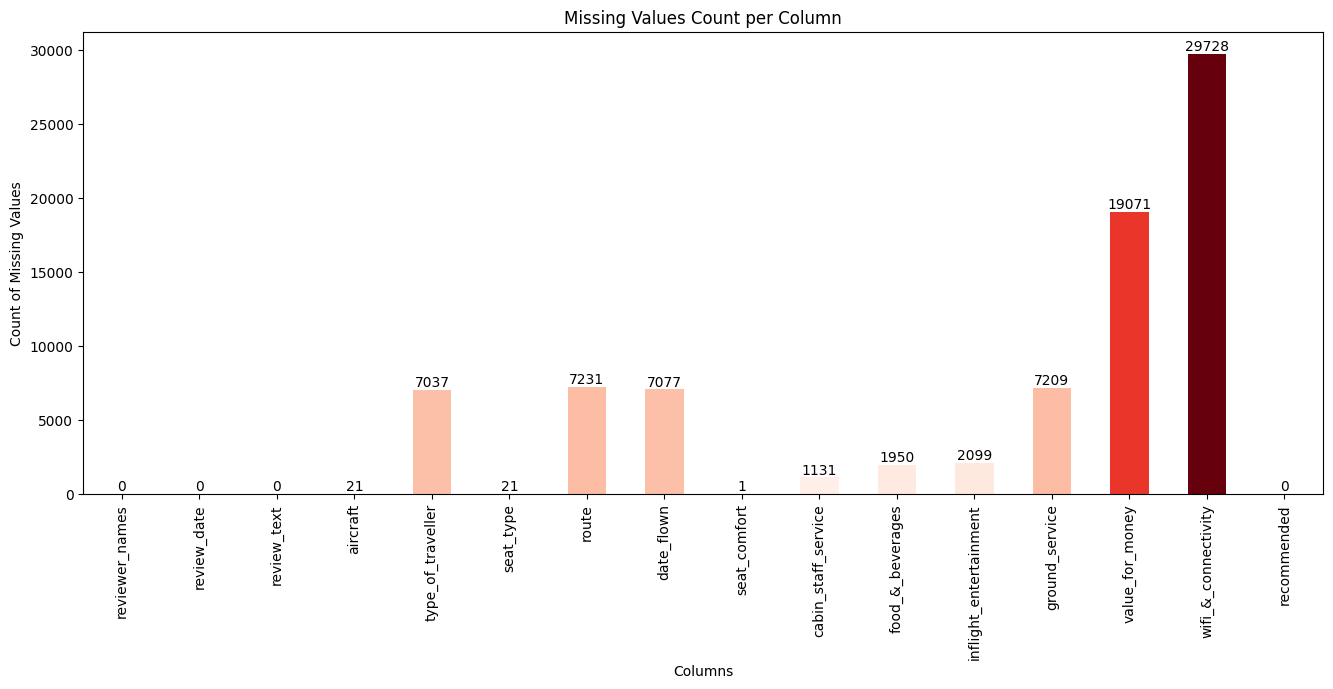

In [ ]:
na_counts = df.isna().sum()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(na_counts.min(), na_counts.max())
colors = plt.cm.Reds(norm(na_counts))

# Create the bar plot with the specified colors
ax = na_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(na_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values Count per Column')
plt.show()

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

,0
reviewer_names,0
review_date,0
review_text,0
aircraft,0
type_of_traveller,0
seat_type,0
route,0
date_flown,0
seat_comfort,0
cabin_staff_service,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15932 entries, 1 to 45208
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reviewer_names          15932 non-null  object 
 1   review_date             15932 non-null  object 
 2   review_text             15932 non-null  object 
 3   aircraft                15932 non-null  object 
 4   type_of_traveller       15932 non-null  object 
 5   seat_type               15932 non-null  object 
 6   route                   15932 non-null  object 
 7   date_flown              15932 non-null  object 
 8   seat_comfort            15932 non-null  float64
 9   cabin_staff_service     15932 non-null  float64
 10  food_&_beverages        15932 non-null  float64
 11  inflight_entertainment  15932 non-null  float64
 12  ground_service          15932 non-null  float64
 13  value_for_money         15932 non-null  float64
 14  wifi_&_connectivity     15932 non-null  flo

# Labelling The Sentiment

######## To label our data, we will use both TextBlob and VaderSentiment. The rationale for employing both methods is to account for potential discrepancies in sentiment analysis. By considering only those reviews that yield consistent results from both approaches, we can reduce error and enhance the reliability of our labeling process.

### Using TextBlob For Labelling
***

> Add blockquote



In [ ]:
from textblob import TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(text)
    # TextBlob returns polarity, where > 0 is positive, < 0 is negative, and 0 is neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['textblob_sentiment'] = df['review_text'].apply(textblob_sentiment)

In [ ]:
df.sample(10)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,textblob_sentiment
14846,G Morrison,2023-03-30,✅ Trip Verified | We were loyal Turkish Airlin...,A330,Couple Leisure,Business Class,Newark to İstanbul,March 2023,2.0,2.0,2.0,2.0,1.0,2.0,1.0,no,positive
6423,M Miron,2023-12-18,✅ Trip Verified | My in-flight entertainment ...,Solo Leisure,Solo Leisure,Economy Class,Ho Chi Minh City to Manchester via Doha,December 2023,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
24430,I Sarven,2021-08-04,"✅ Trip Verified | The service was bad, the st...",Family Leisure,Family Leisure,Economy Class,Orlando to Newark,August 2021,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
35959,Beverly Smith,2021-07-17,Not Verified | Changed my 1 star to a 4 star ...,Couple Leisure,Couple Leisure,Economy Class,Memphis to Colorado Springs,July 2021,3.0,3.0,3.0,3.0,3.0,3.0,3.0,yes,positive
25874,Richard Westlund,2018-06-30,✅ Trip Verified | Kansas to Frankfurt via Chi...,Couple Leisure,Couple Leisure,First Class,Kansas to Frankfurt via Chicago,October 2017,4.0,3.0,3.0,3.0,3.0,3.0,1.0,no,positive
1861,Julie Torcasio,2017-04-25,✅ Verified Review | London Heathrow to Bangko...,Couple Leisure,Couple Leisure,Business Class,London Heathrow to Bangkok,April 2017,4.0,4.0,4.0,3.0,3.0,3.0,4.0,yes,positive
40266,Derek Bugaj,2023-04-16,Not Verified | Worst airline experience I have...,Couple Leisure,Couple Leisure,Economy Class,New Orleans to Charlotte,April 2023,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,positive
21658,JulieAnn Beck,2019-01-26,Not Verified | My husband and I had flown Del...,Couple Leisure,Couple Leisure,Economy Class,Seattle to Salt Lake City,October 2018,2.0,1.0,1.0,1.0,1.0,3.0,1.0,no,positive
40875,S Powell,2022-04-25,Not Verified | Worst service I’ve ever experi...,Couple Leisure,Couple Leisure,Economy Class,London to Wichita via Chicago,April 2022,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
26207,Peter Jensen,2017-12-14,✅ Trip Verified | Started with 1 hour and 45 m...,Boeing 757,Business,Economy Class,Santa Ana to Ottawa,December 2017,1.0,1.0,3.0,3.0,1.0,2.0,1.0,no,positive


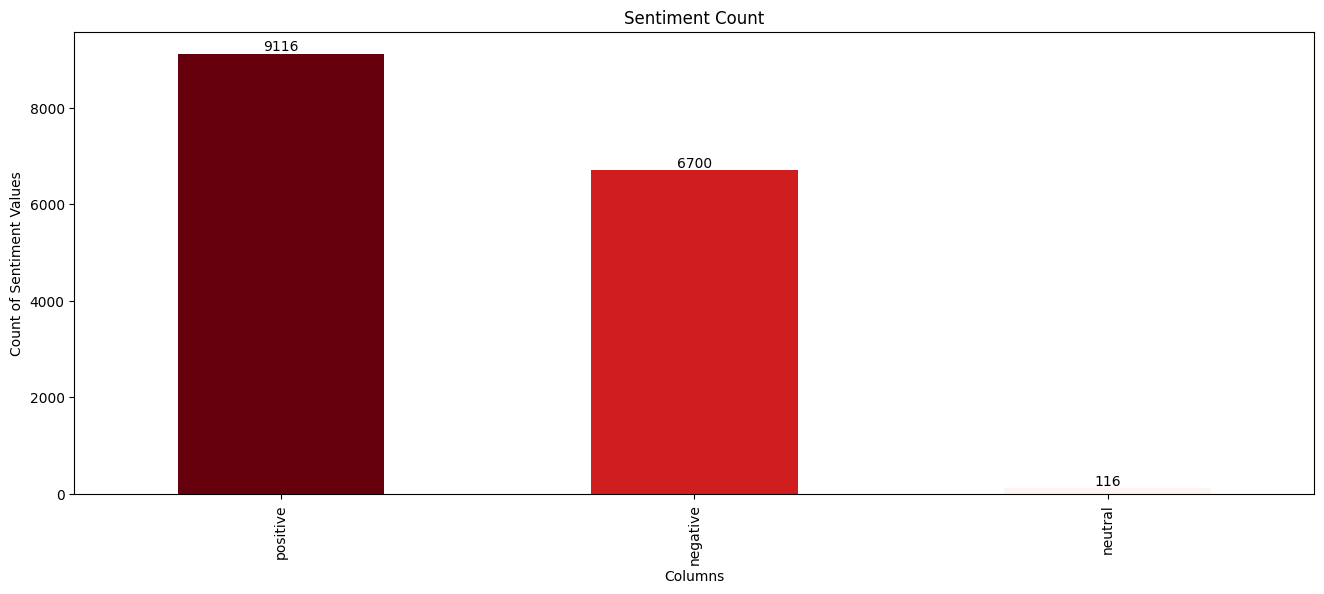

In [ ]:
tb_counts = df['textblob_sentiment'].value_counts()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(tb_counts.min(), tb_counts.max())
colors = plt.cm.Reds(norm(tb_counts))

# Create the bar plot with the specified colors
ax = tb_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(tb_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Sentiment Values')
plt.title('Sentiment Count')
plt.show()

### Using vaderSentiment For Labelling



In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    # VADER returns a compound score, where > 0 is positive, < 0 is negative, and around 0 is neutral
    if vs['compound'] > 0.05:
        return 'positive'
    elif vs['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['vader_sentiment'] = df['review_text'].apply(vader_sentiment)

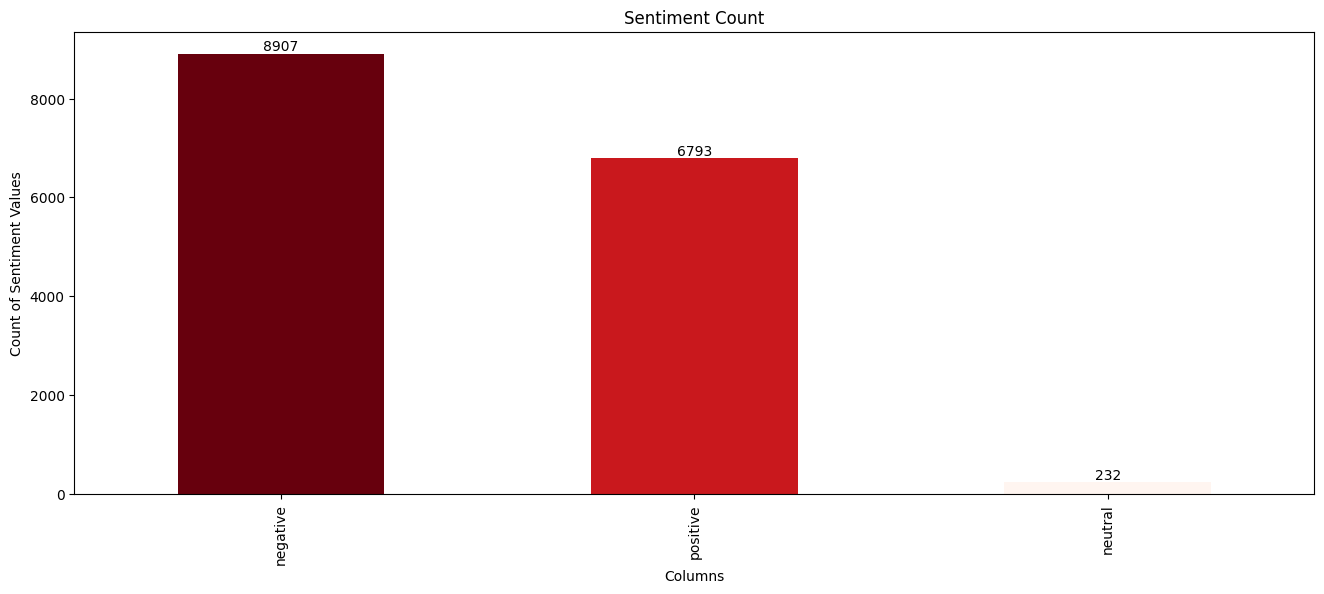

In [ ]:
vs_counts = df['vader_sentiment'].value_counts()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(vs_counts.min(), vs_counts.max())
colors = plt.cm.Reds(norm(vs_counts))

# Create the bar plot with the specified colors
ax = vs_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(vs_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Sentiment Values')
plt.title('Sentiment Count')
plt.show()

In [94]:
df[df['textblob_sentiment']==df['vader_sentiment']].shape

(11771, 18)

In [95]:
df=df[df['textblob_sentiment']==df['vader_sentiment']]

In [96]:
df.shape

(11771, 18)

In [97]:
df.drop(columns=['textblob_sentiment'],inplace=True)

<ipython-input-97-f95f6e18e11e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['textblob_sentiment'],inplace=True)


In [98]:
df.rename(columns={'vader_sentiment':'sentiment'},inplace=True)

<ipython-input-98-e71e6e909c4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'vader_sentiment':'sentiment'},inplace=True)


In [99]:
df.sample(10)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment
21727,Mary Jane Neri,2018-11-15,Not Verified | San Antonio to Los Angeles. My...,Business,Business,Business Class,San Antonio to Los Angeles,November 2018,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
11873,J Hannesung,2023-07-09,✅ Trip Verified | We had this unpleasant expe...,Family Leisure,Family Leisure,Economy Class,Denpasar to Kansai via Singapore,July 2023,4.0,4.0,4.0,4.0,1.0,4.0,4.0,no,negative
18446,Benedict Jones,2018-10-12,✅ Trip Verified | We have just returned from ...,A330,Couple Leisure,Economy Class,Istanbul to London,October 2018,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,positive
1335,Colin Voide,2018-06-20,✅ Trip Verified | London to Zurich. The airli...,Boeing 767,Business,Economy Class,London to Zurich,June 2018,3.0,2.0,1.0,1.0,4.0,1.0,4.0,no,positive
43742,Matthew Surprenant,2018-05-01,✅ Trip Verified | Cali to Montreal via Miami....,Boeing 737-800,Solo Leisure,Economy Class,Cali to Montreal via Miami,April 2018,2.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
9057,S Chan,2018-07-02,✅ Trip Verified | Hong Kong to Singapore. A v...,A350,Couple Leisure,Business Class,Hong Kong to Singapore,June 2018,5.0,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive
15227,Gary Scoffin,2021-06-19,Not Verified | The attitude problem begins at...,A321,Solo Leisure,Economy Class,Athens to Istanbul,May 2021,2.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
14509,Michael Slossar,2024-08-14,✅ Trip Verified | This airline will take your ...,Business,Business,Economy Class,Newark to Antalya via Istanbul,March 2024,3.0,5.0,4.0,4.0,3.0,4.0,3.0,no,positive
18428,D Merken,2018-11-15,✅ Trip Verified | Cologne to Bogota via Istan...,Business,Business,Economy Class,Cologne to Bogota via Istanbul,November 2018,3.0,3.0,4.0,4.0,3.0,3.0,2.0,no,negative
27049,Gil Brady,2015-11-16,Tampa to San Diego via Houston. United continu...,Boeing 737-900,Business,Economy Class,TPA to SAN via IAH,November 2015,1.0,3.0,1.0,1.0,3.0,1.0,1.0,no,positive


In [100]:
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

In [101]:
positive_sample_size = 5000
negative_sample_size = 5000

In [102]:
positive_sample = positive_reviews.sample(positive_sample_size, random_state=42)
negative_sample = negative_reviews.sample(negative_sample_size, random_state=42)

In [137]:
stratified_data = pd.concat([positive_sample, negative_sample])

In [138]:
stratified_data.sample(10)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment
40056,M Angus,2023-08-04,✅ Trip Verified | Literally every time I fly A...,Couple Leisure,Couple Leisure,Economy Class,Dallas to Peoria,August 2023,2.0,2.0,1.0,1.0,1.0,1.0,1.0,no,positive
23706,Patricia Yu Asensi,2023-01-06,✅ Trip Verified | I was on a flight from Colu...,Solo Leisure,Solo Leisure,Economy Class,Columbus to London via Newark,January 2023,2.0,2.0,2.0,2.0,1.0,1.0,1.0,no,negative
25687,Anurag Dave,2018-09-24,✅ Trip Verified | Mumbai to Los Angeles via N...,Boeing 777-200,Solo Leisure,Economy Class,Mumbai to Los Angeles via Newark,September 2018,2.0,2.0,2.0,2.0,2.0,2.0,2.0,no,negative
25628,Calvin M Silva,2018-10-28,✅ Trip Verified | Honolulu to Tokyo Narita. F...,Boeing 777,Solo Leisure,Economy Class,Honolulu to Tokyo Narita,October 2018,4.0,5.0,5.0,4.0,5.0,3.0,5.0,yes,positive
11068,Guido Stevens,2016-11-14,Amsterdam to Melbourne via Singapore with Sing...,A350 / Boeing 777-300ER,Solo Leisure,Economy Class,AMS to MEL via SIN,October 2016,4.0,4.0,5.0,4.0,4.0,4.0,4.0,yes,positive
4853,P Jayatharan,2017-12-27,✅ Trip Verified | Boston to Colombo round tri...,Solo Leisure,Solo Leisure,Economy Class,Boston to Colombo via Dubai,December 2017,2.0,1.0,1.0,3.0,1.0,1.0,1.0,no,negative
38209,A Porter,2018-03-31,✅ Trip Verified | Flagstaff to Salt Lake City...,Business,Business,First Class,Flagstaff to Salt Lake City,March 2018,2.0,1.0,1.0,1.0,1.0,1.0,1.0,no,positive
33672,J Haavis,2016-01-01,Brussels to Helsinki via Copenhagen route that...,A321,Family Leisure,Economy Class,BRU to HEL via CPH,December 2015,3.0,3.0,1.0,1.0,4.0,2.0,4.0,no,positive
39918,Jeff Hepburn,2023-12-05,"Not Verified | Upon boarding the plane, the s...",Family Leisure,Family Leisure,Economy Class,Dallas to Jackson,December 2023,2.0,2.0,2.0,2.0,1.0,2.0,2.0,no,positive
7813,Ugo Colombo,2017-03-27,"✅ Verified Review | Cape Town to Doha, Seat 2...",Boeing 777-ER / A330-300,Solo Leisure,Business Class,Cape Town to Milan via Doha,March 2017,4.0,5.0,5.0,5.0,5.0,4.0,4.0,yes,positive


In [139]:
stratified_data['sentiment'].value_counts()

,count
sentiment,
positive,5000
negative,5000


In [140]:
df=stratified_data.copy()

In [141]:
df['num_characters'] = df['review_text'].apply(len)

In [142]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
df['num_words'] = df['review_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [144]:
df['num_sentences'] = df['review_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [145]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences
34035,Robert McDonald,2024-08-31,Not Verified | American airlines is the worst...,Business,Business,Economy Class,Bogota to Washington via Miami,August 2024,2.0,5.0,1.0,1.0,1.0,1.0,1.0,no,negative,703,141,8
31373,M Termuk,2018-12-22,✅ Trip Verified | Toronto to Edmonton. I am f...,Business,Business,Business Class,Toronto to Edmonton,December 2018,5.0,5.0,5.0,5.0,3.0,5.0,3.0,yes,positive,470,94,9
6797,I Vardina,2022-06-03,✅ Trip Verified | The customer service by all...,Family Leisure,Family Leisure,Economy Class,Toronto to Kozhikode via Montreal / Doha,May 2022,3.0,5.0,4.0,3.0,5.0,3.0,5.0,yes,positive,415,77,5
33609,A Karlsson,2016-08-12,✅ Verified Review | 1st August. A very short ...,ATR-72,Solo Leisure,Premium Economy,ARN to KLR,August 2016,4.0,4.0,4.0,1.0,5.0,1.0,4.0,yes,positive,1065,225,14
34097,Shawndrick Redding,2024-07-18,Not Verified | I booked and paid for seats. ...,Family Leisure,Family Leisure,Economy Class,New Orleans to Tulum,July 2024,1.0,1.0,1.0,1.0,1.0,4.0,1.0,no,negative,599,132,7


In [146]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10000.00000,10000.000000,10000.000000
mean,829.75410,168.810700,9.459900
std,593.81749,122.193113,5.947901
min,115.00000,25.000000,1.000000
25%,423.75000,85.000000,5.750000
50%,652.00000,132.000000,8.000000
75%,1034.00000,211.000000,12.000000
max,4212.00000,831.000000,52.000000


##### Overview of the Summary Statistics:

* Count: Each of the three columns (num_characters, num_words, num_sentences) has
10,000 entries, indicating the total number of samples analyzed.

* Mean (Average):
  * Characters: The average text length is approximately 830 characters.
  * Words: On average, each entry contains about 169 words.
  * Sentences: Each entry has an average of about 9.5 sentences.

* Standard Deviation (std):

  * Characters: A standard deviation of about 594 indicates that there is considerable variation in text length across the entries.
  * Words: The standard deviation of approximately 122 suggests a moderate variation in the number of words.
  * Sentences: A standard deviation of about 5.9 indicates that the number of sentences also varies, but to a lesser extent.

* Minimum (min):

  * Characters: The shortest entry has 115 characters.
  * Words: The entry with the fewest words contains 25 words.
  * Sentences: The minimum number of sentences is 1.

* 25th Percentile (25%):

  * Characters: 25% of the entries have 424 characters or fewer.
  * Words: 25% of entries have 85 words or fewer.
  * Sentences: 25% have 5.75 sentences or fewer.

* Median (50%):

  * Characters: The median length is 652 characters, indicating that half of the entries are shorter than this value.
  * Words: The median is 132 words, suggesting that half of the entries contain fewer than 132 words.
  * Sentences: The median number of sentences is 8, meaning half of the entries have 8 sentences or fewer.

* 75th Percentile (75%):

  * Characters: 75% of entries have 1034 characters or fewer.
  * Words: 75% of entries have 211 words or fewer.
  * Sentences: 75% have 12 sentences or fewer.

* Maximum (max):

  * Characters: The longest entry contains 4212 characters.
  * Words: The longest entry has 831 words.
  * Sentences: The maximum number of sentences in an entry is 52.

In [147]:
df[df['sentiment'] == 'positive'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5000.000000,5000.000000,5000.000000
mean,857.728400,173.216400,9.685800
std,622.702679,128.028943,6.206737
min,154.000000,25.000000,1.000000
25%,430.000000,86.000000,6.000000
50%,667.000000,134.000000,8.000000
75%,1076.250000,217.000000,12.000000
max,4212.000000,831.000000,50.000000


### Overview of the Summary Statistics:

* **Count**: Each of the three columns (num_characters, num_words, num_sentences) has 5,000 entries, indicating the total number of samples analyzed.

* **Mean (Average)**:
  * **Characters**: The average text length is approximately 858 characters.
  * **Words**: On average, each entry contains about 173 words.
  * **Sentences**: Each entry has an average of about 9.7 sentences.

* **Standard Deviation (std)**:
  * **Characters**: A standard deviation of about 623 indicates considerable variation in text length across the entries.
  * **Words**: The standard deviation of approximately 128 suggests a moderate variation in the number of words.
  * **Sentences**: A standard deviation of about 6.2 indicates that the number of sentences also varies, but to a lesser extent.

* **Minimum (min)**:
  * **Characters**: The shortest entry has 154 characters.
  * **Words**: The entry with the fewest words contains 25 words.
  * **Sentences**: The minimum number of sentences is 1.

* **25th Percentile (25%)**:
  * **Characters**: 25% of the entries have 430 characters or fewer.
  * **Words**: 25% of entries have 86 words or fewer.
  * **Sentences**: 25% have 6 sentences or fewer.

* **Median (50%)**:
  * **Characters**: The median length is 667 characters, indicating that half of the entries are shorter than this value.
  * **Words**: The median is 134 words, suggesting that half of the entries contain fewer than 134 words.
  * **Sentences**: The median number of sentences is 8, meaning half of the entries have 8 sentences or fewer.

* **75th Percentile (75%)**:
  * **Characters**: 75% of entries have 1076 characters or fewer.
  * **Words**: 75% of entries have 217 words or fewer.
  * **Sentences**: 75% have 12 sentences or fewer.

* **Maximum (max)**:
  * **Characters**: The longest entry contains 4212 characters.
  * **Words**: The longest entry has 831 words.
  * **Sentences**: The maximum number of sentences in an entry is 50.

In [148]:
df[df['sentiment'] == 'negative'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5000.000000,5000.000000,5000.000000
mean,801.779800,164.405000,9.234000
std,562.125341,115.909715,5.668904
min,115.000000,25.000000,1.000000
25%,419.000000,85.000000,5.000000
50%,643.000000,131.500000,8.000000
75%,998.000000,206.000000,11.000000
max,3504.000000,765.000000,52.000000


### Overview of the Summary Statistics:

* **Count**: Each of the three columns (num_characters, num_words, num_sentences) has 5,000 entries, indicating the total number of samples analyzed.

* **Mean (Average)**:
  * **Characters**: The average text length is approximately 802 characters.
  * **Words**: On average, each entry contains about 164 words.
  * **Sentences**: Each entry has an average of about 9.2 sentences.

* **Standard Deviation (std)**:
  * **Characters**: A standard deviation of about 562 indicates considerable variation in text length across the entries.
  * **Words**: The standard deviation of approximately 116 suggests a moderate variation in the number of words.
  * **Sentences**: A standard deviation of about 5.7 indicates that the number of sentences also varies, but to a lesser extent.

* **Minimum (min)**:
  * **Characters**: The shortest entry has 115 characters.
  * **Words**: The entry with the fewest words contains 25 words.
  * **Sentences**: The minimum number of sentences is 1.

* **25th Percentile (25%)**:
  * **Characters**: 25% of the entries have 419 characters or fewer.
  * **Words**: 25% of entries have 85 words or fewer.
  * **Sentences**: 25% have 5 sentences or fewer.

* **Median (50%)**:
  * **Characters**: The median length is 643 characters, indicating that half of the entries are shorter than this value.
  * **Words**: The median is approximately 132.5 words, suggesting that half of the entries contain fewer than this number of words.
  * **Sentences**: The median number of sentences is 8, meaning half of the entries have 8 sentences or fewer.

* **75th Percentile (75%)**:
  * **Characters**: 75% of entries have 998 characters or fewer.
  * **Words**: 75% of entries have 206 words or fewer.
  * **Sentences**: 75% have 11 sentences or fewer.

* **Maximum (max)**:
  * **Characters**: The longest entry contains 3504 characters.
  * **Words**: The longest entry has 765 words.
  * **Sentences**: The maximum number of sentences in an entry is 52.

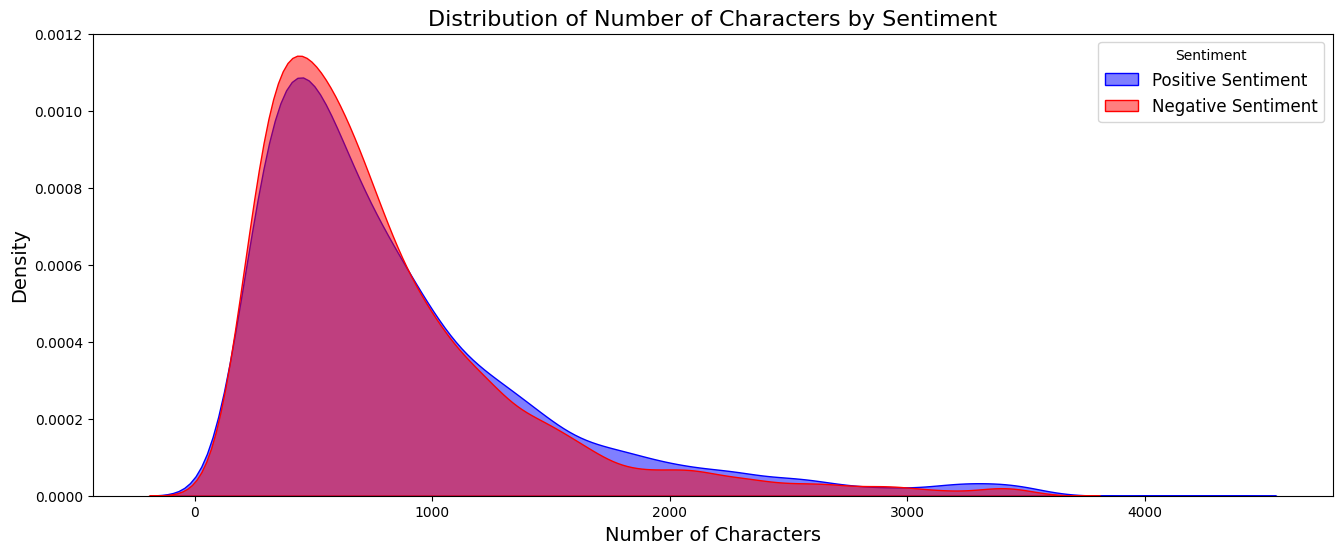

In [149]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_characters'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_characters'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Characters by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

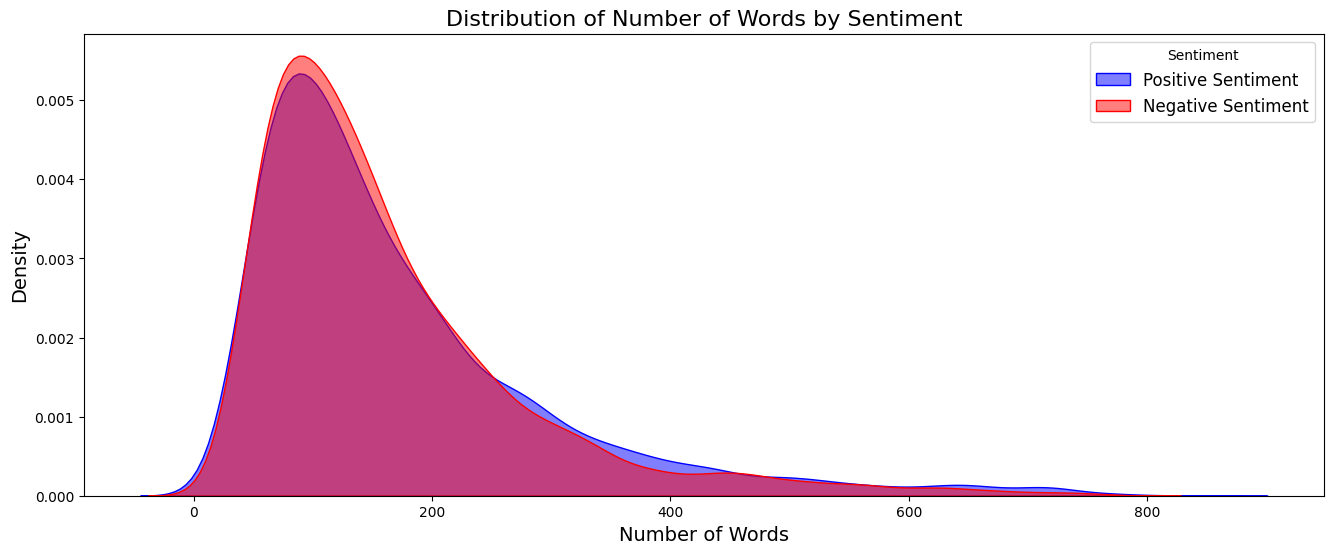

In [150]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_words'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_words'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Words by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

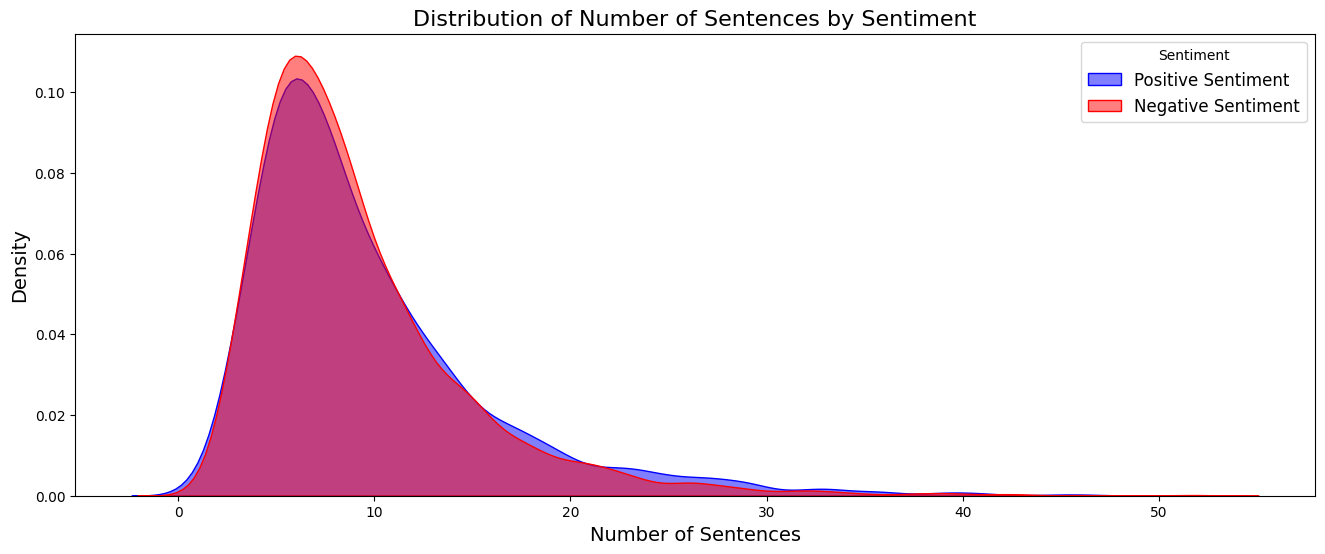

In [151]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_sentences'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_sentences'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Sentences', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Sentences by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

 * **Key Observations:**
    * **Overlap**: The distributions for positive and negative sentiment are quite similar in shape and heavily overlap, implying that the length of a message does not vary drastically based on its sentiment.
    * **Negative Sentiment** Tends to Have a Higher Peak: The red (negative) distribution slightly peaks higher, suggesting that negative messages may have a slightly higher proportion at lower character counts than positive ones.
    * **Longer Messages**: After around 1000 characters, both distributions drop off, with very few messages longer than 2000 characters.
    

  * **In conclusion**, both positive and negative sentiments share a similar character length distribution, but negative sentiment tends to have a slightly higher density for shorter messages.

# Handling Emojis

In [160]:
import emoji


In [161]:
def demojize_text(text):
    return emoji.demojize(text)

In [162]:
df.loc[:, 'clean_text'] = df['review_text'].apply(demojize_text)

In [163]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
24467,Miguel Filgu,2021-07-10,Not Verified | I planned my vacation with 3 m...,Couple Leisure,Couple Leisure,Economy Class,Newark to Los Angeles,July 2021,1.0,1.0,...,1.0,1.0,1.0,no,negative,554,119,4,no,Not Verified | I planned my vacation with 3 m...
10442,Kay Kay Au,2021-12-17,"✅ Trip Verified | Due to the pandemic, it has...",Boeing 777-300 ER,Solo Leisure,Business Class,Singapore to Frankfurt,December 2021,5.0,5.0,...,5.0,5.0,5.0,yes,positive,979,192,12,yes,:check_mark_button: Trip Verified | Due to th...
6520,Ine Joosten,2023-07-29,✅ Trip Verified | There was an issue with our...,Family Leisure,Family Leisure,Economy Class,Phuket to Brussels via Doha,July 2023,4.0,4.0,...,4.0,5.0,5.0,yes,positive,297,60,3,yes,:check_mark_button: Trip Verified | There was...
5191,Walter Cornejo,2016-09-22,✅ Verified Review | Orlando to Dubai. Check i...,Boeing 777-200,Solo Leisure,Economy Class,MCO to DXB,July 2016,4.0,5.0,...,4.0,3.0,5.0,yes,positive,473,98,4,no,:check_mark_button: Verified Review | Orlando...
23868,Anila Lenka,2022-08-23,✅ Trip Verified | United Airlines does not pr...,Family Leisure,Family Leisure,Economy Class,Austin to Newark,August 2022,1.0,1.0,...,1.0,1.0,1.0,no,negative,568,115,6,yes,:check_mark_button: Trip Verified | United Ai...


In [156]:
df['trip_verified'] = np.where(df['review_text'].str.contains('Trip Verified', case=False, na=False), 'yes', 'no')

In [157]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified
18505,Saeed Alzharani,2018-08-01,✅ Trip Verified | Riyadh to Kiev via Istanbul...,Business,Business,Economy Class,Riyadh to Kiev via Istanbul,July 2018,3.0,1.0,...,2.0,1.0,1.0,2.0,no,negative,402,79,6,yes
37547,Jackie Holsome,2019-01-19,✅ Trip Verified | Oakland to Montego Bay via ...,Solo Leisure,Solo Leisure,Economy Class,Oakland to Montego Bay,January 2019,4.0,5.0,...,5.0,5.0,5.0,5.0,yes,positive,436,88,8,yes
14660,E Darfine,2023-12-13,✅ Trip Verified | Our baggage was lost (they ...,Family Leisure,Family Leisure,Economy Class,Kazan to Istanbul,August 2023,3.0,3.0,...,3.0,1.0,1.0,1.0,no,negative,571,114,6,yes
32844,Adrian Neill,2022-07-19,Not Verified | By far the worst experience I'...,Solo Leisure,Solo Leisure,Economy Class,Toronto to Guadalajara,July 2022,1.0,1.0,...,1.0,1.0,1.0,1.0,no,negative,539,110,8,no
42328,S Neal,2019-12-05,✅ Trip Verified | This was the worst flying e...,Solo Leisure,Solo Leisure,Economy Class,Cleveland to LaGuardia,August 2019,3.0,3.0,...,1.0,1.0,1.0,1.0,no,negative,3412,753,42,yes


# Lowercasing

In [164]:
df['clean_text']=df['clean_text'].str.lower()

In [165]:
df.sample(2)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
42335,T Hayns,2019-12-02,✅ Trip Verified | Houston to Dallas. Absolute...,Solo Leisure,Solo Leisure,Economy Class,Houston to Dallas,December 2019,1.0,1.0,...,1.0,1.0,1.0,no,negative,205,39,4,yes,:check_mark_button: trip verified | houston t...
34564,C Barton,2023-06-27,✅ Trip Verified | Worst experience ever. Flig...,Solo Leisure,Solo Leisure,Economy Class,Philadelphia to Denver,June 2023,2.0,4.0,...,1.0,1.0,1.0,no,negative,648,142,14,yes,:check_mark_button: trip verified | worst exp...


# Dealing with chat words

In [175]:
chat_words={
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BF": "Boy Friend",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "lol": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "4MY": "For My",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "R": "Are",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when. TFW internet slang often goes in a caption to an image.",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"

}

In [176]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [177]:
df['clean_text']=df['clean_text'].apply(chat_conversion)

# dealing with punctuation

In [178]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [179]:
exclude = string.punctuation

In [180]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [181]:
df['clean_text']=df['clean_text'].apply(remove_punc)

In [183]:
df.head(2)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
12560,Jude Mudannayake,2017-07-21,✅ Verified Review | Dubai to Seoul via Singap...,Boeing 777-300 ER,Solo Leisure,Business Class,Dubai to Seoul via Singapore,July 2017,5.0,5.0,...,5.0,4.0,5.0,yes,positive,826,156,12,no,checkmarkbutton verified review dubai to seou...
5064,L Baxter,2017-02-18,"✅ Verified Review | To me, Emirates hasn't ch...",A380,Couple Leisure,Economy Class,Munich to Beijing via Dubai,January 2017,5.0,4.0,...,4.0,5.0,5.0,yes,positive,794,154,9,no,checkmarkbutton verified review to me emirate...


# Tokenization

In [184]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [185]:
df['clean_text']=df['clean_text'].apply(lambda text: [token.text for token in nlp(text)])

In [186]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
43741,Joseph Goodrich,2018-05-01,✅ Trip Verified | Charlotte to San Diego. Amer...,A320,Solo Leisure,Economy Class,Charlotte to San Diego,April 2018,2.0,4.0,...,3.0,1.0,3.0,no,positive,432,90,9,yes,"[checkmarkbutton, trip, verified, , charlotte..."
7860,Pail Giggs,2017-01-27,"✅ Verified Review | Doha to London Heathrow, ...",Boeing 787,Business,Economy Class,Doha to London,January 2017,3.0,5.0,...,4.0,3.0,5.0,yes,positive,593,110,5,no,"[checkmarkbutton, verified, review, , doha, t..."
4811,Frank Pollacchi,2018-02-02,✅ Trip Verified | Glasgow to Auckland via Dub...,A380,Couple Leisure,Economy Class,Glasgow to Auckland via Dubai,January 2018,3.0,4.0,...,1.0,2.0,3.0,no,negative,2648,508,22,yes,"[checkmarkbutton, trip, verified, , glasgow, ..."
36721,P Pennant,2019-12-21,✅ Trip Verified | Sioux City to Chicago. Every...,Family Leisure,Family Leisure,Economy Class,Sioux City to Chicago,December 2019,1.0,1.0,...,1.0,1.0,1.0,no,negative,333,59,5,yes,"[checkmarkbutton, trip, verified, , sioux, ci..."
43488,Michael Nichols,2018-08-06,✅ Trip Verified | Dallas to Los Angeles. Late...,Boeing 737,Business,Economy Class,Dallas to Los Angeles,August 2018,1.0,1.0,...,1.0,1.0,1.0,no,negative,391,82,7,yes,"[checkmarkbutton, trip, verified, , dallas, t..."


# Stop words Removal

In [190]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [193]:
# Add custom words to the stopwords list
custom_words = ['checkmarkbutton', 'verified']
stop_words = set(stopwords.words('english'))
stop_words.update(custom_words)

In [194]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [195]:
df['clean_text']=df['clean_text'].apply(remove_stopwords)

In [196]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
6536,Kashfia Haque,2023-06-23,Not Verified | Every time the food was disgust...,Family Leisure,Family Leisure,Economy Class,Boston to Dhaka via Doha,February 2023,1.0,3.0,...,2.0,1.0,3.0,no,negative,861,187,18,no,"[ , every, Tears, eyes, food, disgusting, dess..."
15311,M Kalmer,2020-11-10,✅ Trip Verified | I liked the airline: profes...,A321neo,Solo Leisure,Economy Class,Moscow-Vnukovo to Berlin-Bradenburg via Istanbul,November 2020,5.0,5.0,...,3.0,1.0,5.0,yes,positive,672,138,7,yes,"[trip, , liked, airline, professional, crew, ..."
8051,C Stanhope,2016-03-31,✅ Verified Review | London to Colombo via Doh...,Boeing 777 / 787 / A340,Couple Leisure,Economy Class,LHR to CNB via DOH,March 2016,1.0,4.0,...,3.0,3.0,3.0,no,positive,370,76,6,no,"[review, , london, colombo, via, doha, qatar,..."
6452,S Han,2023-10-21,✅ Trip Verified | I took flight QR719 Doha to...,Solo Leisure,Solo Leisure,Economy Class,Doha to Seattle,October 2023,5.0,5.0,...,5.0,5.0,5.0,yes,positive,353,72,3,yes,"[trip, , took, flight, qr719, doha, seattle, ..."
35854,Brittany Parsons,2021-08-12,"✅ Trip Verified | My family, which includes m...",Family Leisure,Family Leisure,Economy Class,Chicago to Greenville,August 2021,1.0,1.0,...,1.0,1.0,1.0,no,positive,2537,543,29,yes,"[trip, , family, includes, 3, 5, year, old, c..."


# Steming

In [197]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [198]:
df['clean_text']=df['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [199]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
39695,L Hayle,2024-07-02,✅ Trip Verified | Some things never change! A...,Business,Business,Economy Class,Charlotte to Jacksonville,July 2024,1.0,1.0,...,1.0,4.0,1.0,no,negative,1204,248,12,yes,"[trip, , thing, never, chang, weekli, road, w..."
424,Amanda Edgar,2022-12-22,✅ Trip Verified | Another BA Shambles. Starte...,Boeing 777-300,Couple Leisure,First Class,London to Male,December 2022,2.0,2.0,...,3.0,1.0,1.0,no,positive,1492,327,24,yes,"[trip, , anoth, ba, shambl, start, well, exce..."
41820,R Farish,2021-03-23,Not Verified | American Airlines has the wors...,Couple Leisure,Couple Leisure,Economy Class,Cancun to Oklahoma City via Dallas Ft Worth,March 2021,1.0,1.0,...,1.0,1.0,1.0,no,negative,917,190,8,no,"[ , american, airlin, worst, custom, servic, f..."
37993,Erika Mendez,2018-07-07,Not Verified | Flew American Airlines from Da...,Solo Leisure,Solo Leisure,Economy Class,Dallas to San Diego,July 2018,1.0,1.0,...,1.0,1.0,1.0,no,negative,285,64,5,no,"[ , flew, american, airlin, dalla, san, diego,..."
18181,H Robinson,2019-09-23,✅ Trip Verified | Vienna to Baku via Istanbul....,A330 & A321,Business,Economy Class,Vienna to Baku via Istanbul,September 2019,4.0,4.0,...,3.0,5.0,5.0,yes,positive,515,93,8,yes,"[trip, , vienna, baku, via, istanbul, four, e..."


# removing special characters

In [200]:
import re

def remove_special_characters(text):
    # Define a regex pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'

    # Use re.sub() to replace special characters with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [201]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
6509,Matteo Bertoni,2023-08-20,✅ Trip Verified | Milan to Windhoek via Doha ...,A350-900 / Boeing 787-8,Solo Leisure,Business Class,Milan to Windhoek via Doha,August 2023,5.0,5.0,...,4.0,5.0,5.0,yes,positive,1037,207,13,yes,"[trip, , milan, windhoek, via, doha, return, ..."
18230,Rhanda Clarke,2019-07-19,Not Verified | Dusseldorf to Istanbul via Sey...,Family Leisure,Family Leisure,Economy Class,Dusseldorf to Istanbul via Seychelles,July 2019,3.0,2.0,...,1.0,1.0,2.0,no,negative,672,132,11,no,"[ , dusseldorf, istanbul, via, seychel, flown,..."
7003,Abdul Rasheed Mohammed,2021-02-05,✅ Trip Verified | I flew from Hyderabad - Chic...,A350-1000,Family Leisure,Economy Class,Chicago to Hyderabad via Doha,February 2021,5.0,5.0,...,5.0,5.0,5.0,yes,positive,1021,186,11,yes,"[trip, , flew, hyderabad, , chicago, , hyde..."
28489,Putu Chara,2017-03-23,✅ Verified Review | Hong Kong to Jakarta. I ...,A330-300,Family Leisure,Economy Class,Hong Kong to Jakarta,March 2017,4.0,5.0,...,3.0,5.0,5.0,yes,positive,637,137,7,no,"[review, , hong, kong, jakarta, chose, garuda..."
31873,R Heale,2024-07-10,✅ Trip Verified | I want to shed light on Ame...,Family Leisure,Family Leisure,Economy Class,New Orleans to Dallas,July 2024,1.0,3.0,...,1.0,2.0,1.0,no,negative,3410,730,32,yes,"[trip, , want, shed, light, american, airlin,..."


In [202]:
df['clean_text']=df['clean_text'].apply(lambda tokens: ' '.join(tokens))

In [203]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
31902,Ashley Crump,2024-06-25,Not Verified | Flight took off early and left...,Family Leisure,Family Leisure,Economy Class,Savannah to Saint Martin,June 2024,1.0,1.0,...,1.0,1.0,1.0,no,negative,1441,326,22,no,flight took earli left famili 6 8 passeng un...
4203,M Kassler,2021-09-20,✅ Trip Verified | Space in the A380 economy c...,A380-800,Family Leisure,Economy Class,Dubai to Vienna,September 2021,5.0,5.0,...,3.0,5.0,4.0,yes,positive,567,108,8,yes,trip space a380 economi class great seat pre...
36317,Brenda Cortez,2020-12-28,✅ Trip Verified | My first flight was delayed ...,Solo Leisure,Solo Leisure,Economy Class,Cincinnati to Dallas Fort-Worth,December 2020,3.0,2.0,...,3.0,1.0,2.0,no,negative,1201,258,5,yes,trip first flight delay 5 hour make loos con...
15989,Qaisar Khosa,2017-12-24,✅ Trip Verified | Medina to Lahore via Istanb...,A320 / A 330,Couple Leisure,Economy Class,Medina to Lahore via Istanbul,December 2017,2.0,2.0,...,1.0,1.0,2.0,no,negative,1152,239,14,yes,trip medina lahor via istanbul turkish airli...
15506,Jane Howarth,2019-10-15,✅ Trip Verified | Gatwick to Hurghada via Ist...,Solo Leisure,Solo Leisure,Economy Class,Gatwick to Hurghada via Istanbul,September 2019,3.0,1.0,...,1.0,1.0,1.0,no,negative,1340,275,14,yes,trip gatwick hurghada via istanbul absolut w...


In [204]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [205]:
positive_wc = wc.generate(df[df['sentiment'] == 'positive']['clean_text'].str.cat(sep=" "))

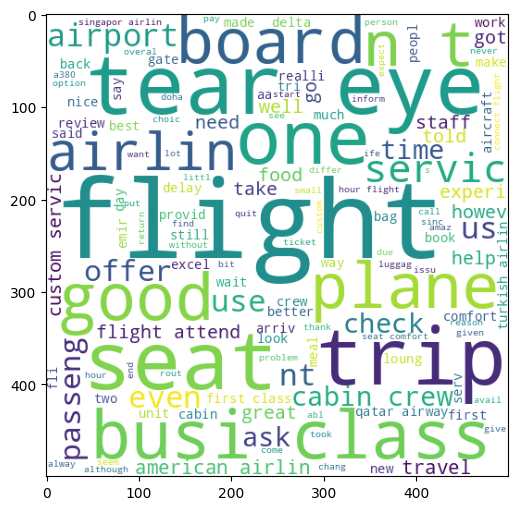

In [206]:
plt.figure(figsize=(16,6))
plt.imshow(positive_wc)

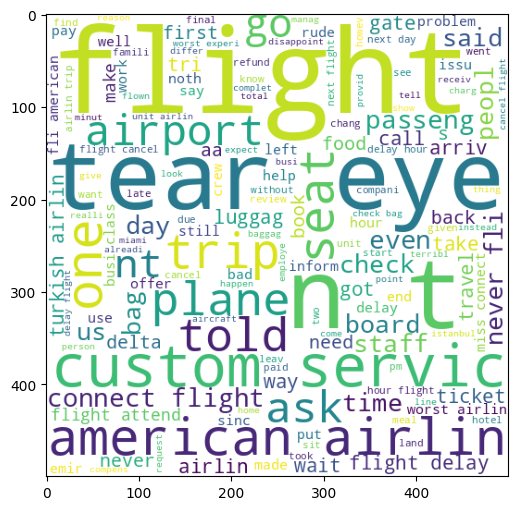

In [207]:
negative_wc = wc.generate(df[df['sentiment'] == 'negative']['clean_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [208]:
positive_corpus = []
for text in df[df['sentiment'] == 'positive']['clean_text'].tolist():
    for t in text.split():
        positive_corpus.append(t)

In [209]:
len(positive_corpus)

408912

In [214]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

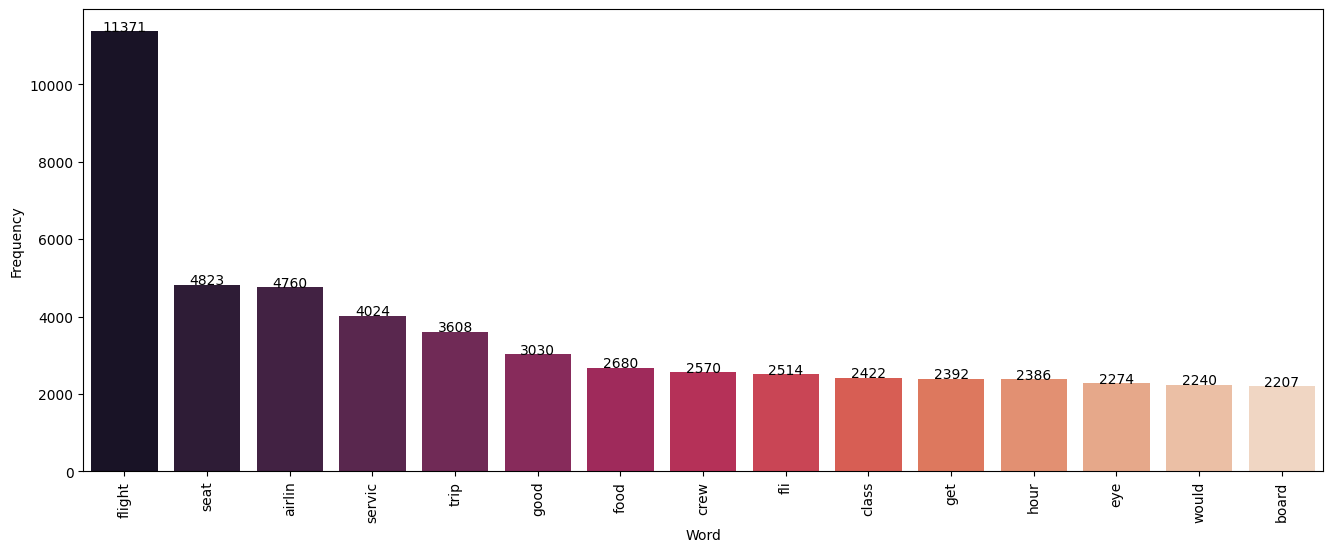

In [218]:
# Assuming positive_corpus is a list of words or tokens
most_common_words = Counter(positive_corpus).most_common(15)

# Convert the most common words to a DataFrame
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a barplot, with colors scaled from highest to lowest frequency
colors = sb.color_palette("rocket", len(common_words_df))  # Using the 'viridis' palette
sb.barplot(x='Word', y='Frequency', data=common_words_df, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Add labels for each bar
for index, row in common_words_df.iterrows():
    plt.text(index, row.Frequency, round(row.Frequency, 2), color='black', ha="center")

# Show the plot
plt.show()

In [219]:
negative_corpus = []
for text in df[df['sentiment'] == 'negative']['clean_text'].tolist():
    for t in text.split():
        negative_corpus.append(t)

In [220]:
len(negative_corpus)

376002

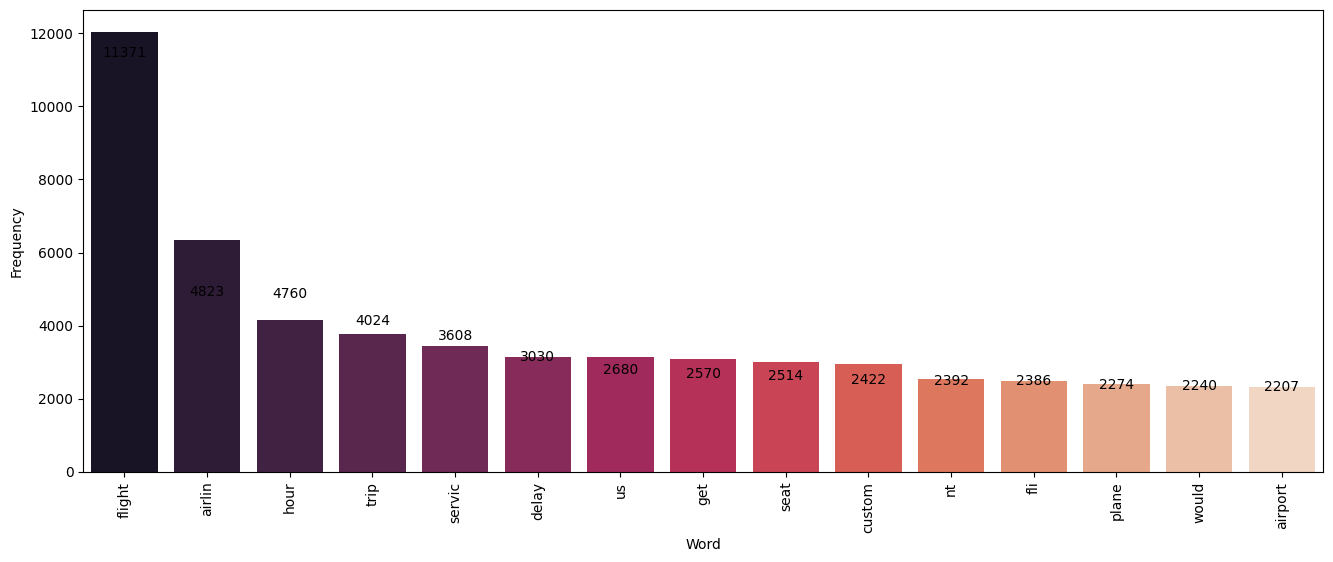

In [221]:
# Assuming positive_corpus is a list of words or tokens
most_common_word = Counter(negative_corpus).most_common(15)

# Convert the most common words to a DataFrame
common_words_df1 = pd.DataFrame(most_common_word, columns=['Word', 'Frequency'])

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a barplot, with colors scaled from highest to lowest frequency
colors = sb.color_palette("rocket", len(common_words_df1))  # Using the 'viridis' palette
sb.barplot(x='Word', y='Frequency', data=common_words_df1, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Add labels for each bar
for index, row in common_words_df.iterrows():
    plt.text(index, row.Frequency, round(row.Frequency, 2), color='black', ha="center")

# Show the plot
plt.show()

In [222]:
df.columns

Index(['reviewer_names', 'review_date', 'review_text', 'aircraft',
       'type_of_traveller', 'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment',
       'ground_service', 'value_for_money', 'wifi_&_connectivity',
       'recommended', 'sentiment', 'num_characters', 'num_words',
       'num_sentences', 'trip_verified', 'clean_text'],
      dtype='object')

In [225]:
#performing encoding on recommended column yes as 1 no as 0

df['trip_verified'] = df['trip_verified'].map({'yes': 1, 'no': 0})


In [226]:

df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

In [233]:

df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [229]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,trip_verified,clean_text
9515,R Clarke,2016-01-13,First leg to Hong Kong from Cebu was on a tire...,A330,Solo Leisure,Business Class,CEB to BAH via HKG,January 2016,3.0,3.0,...,3.0,2.0,3.0,1,positive,621,127,8,0,first leg hong kong cebu tire old plane old se...
35530,R Edwards,2022-02-05,✅ Trip Verified | Customer service over the ph...,Business,Business,Economy Class,Ontario to Dallas Fort-Worth,February 2022,1.0,3.0,...,1.0,4.0,1.0,0,negative,587,120,5,1,trip custom servic phone horribl experi rude...
35411,Daniel Nelson,2022-03-14,✅ Trip Verified | Worst travelling experience...,Family Leisure,Family Leisure,Economy Class,Richmond to Daytona Beach via Charlotte,March 2022,3.0,3.0,...,1.0,1.0,1.0,0,negative,584,114,9,1,trip worst travel experi life flight charlot...
32147,Natalie Hudgens,2023-10-31,✅ Trip Verified | I regret to say that my rec...,Couple Leisure,Couple Leisure,Economy Class,Shreveport LA to Los Angeles CA,October 2023,2.0,2.0,...,1.0,1.0,1.0,0,positive,1824,316,15,1,trip regret say recent experi american airli...
29551,M Yu,2019-11-29,✅ Trip Verified | Kuala Lumpur to Stockholm v...,Couple Leisure,Couple Leisure,Economy Class,Kuala Lumpur to Stockholm via Amsterdam,October 2019,5.0,5.0,...,5.0,5.0,5.0,1,positive,1016,208,13,1,trip kuala lumpur stockholm via amsterdam pl...


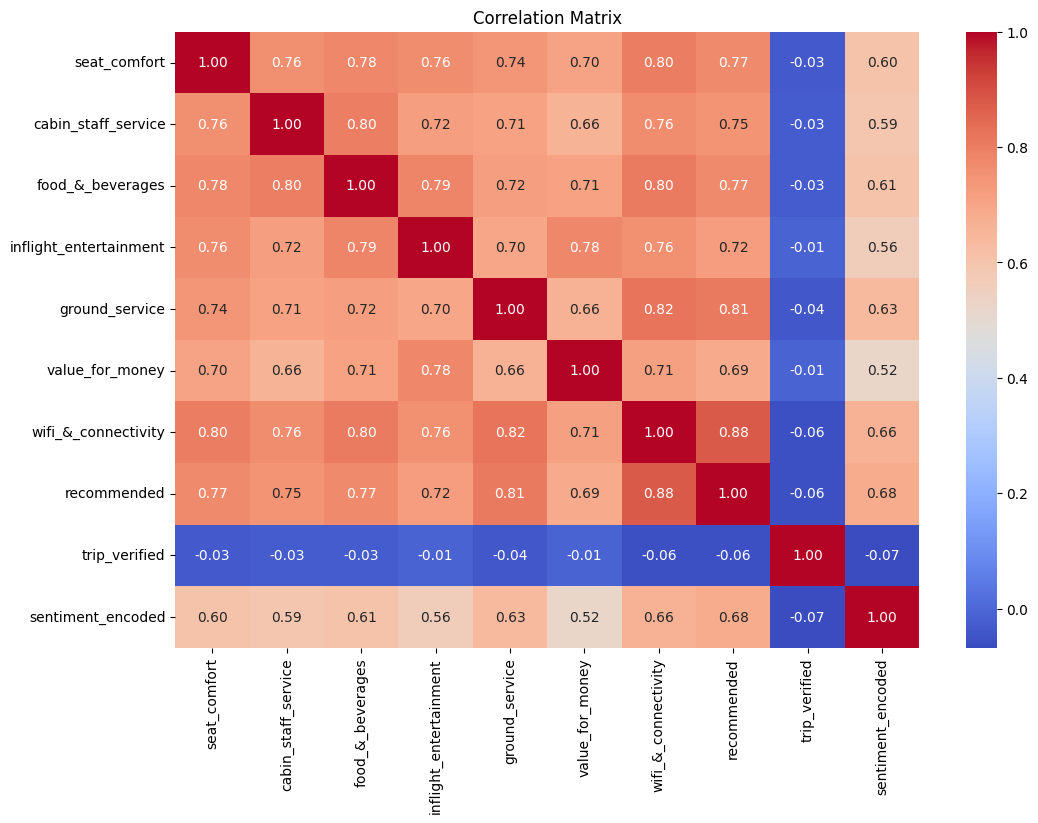

In [234]:
# Select only the columns you want to include in the correlation matrix
correlation_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment',
                       'ground_service', 'value_for_money', 'wifi_&_connectivity',
                       'recommended','trip_verified','sentiment_encoded']  # Exclude 'trip_verified' as it's likely categorical

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()
# You can also visualize the correlation matrix using a heatmap:
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()